<a href="https://colab.research.google.com/github/meidianarahmawati/mlt2hc7/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Kelompok Healthcare 7 



#Requirements

In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Dataset


In [3]:
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_precaution.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/Symptom-severity.csv

--2022-07-23 14:49:20--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632202 (617K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 617.38K  --.-KB/s    in 0.04s   

2022-07-23 14:49:21 (14.1 MB/s) - ‘dataset.csv’ saved [632202/632202]

--2022-07-23 14:49:21--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11025 (11K) [text/p

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('dataset.csv')
severity = pd.read_csv('Symptom-severity.csv')
description = pd.read_csv('symptom_Description.csv')
precaution = pd.read_csv('symptom_precaution.csv')

# Exploratory Data Analysis

Pada bagian berikut ini akan dilakukan exploratory data analysis pada dataset.csv untuk melihat profil datanya.


##Dataset

In [6]:
#5 dataset teratas
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#bentuk data
print("Bentuk data (rows, cols)=>",df.shape)

Bentuk data (rows, cols)=> (4920, 18)


In [8]:
#tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [9]:
#missing values (Null)
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [10]:
#missing values (Na)
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [14]:
#Menghitung presentase missing values dari masing-masing variabel
(df.isnull().sum()/len(df)*100).to_frame('Persentase Missing Value Dataset (%)')

,Persentase Missing Value Dataset (%)
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [17]:
#karakteristik dataset (duplikasi data)
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [16]:
#karakteristik dataset
df.describe().transpose()

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264
Symptom_8,1944,21,abdominal_pain,276
Symptom_9,1692,22,yellowing_of_eyes,228


In [12]:
#menampilkan semua disease
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


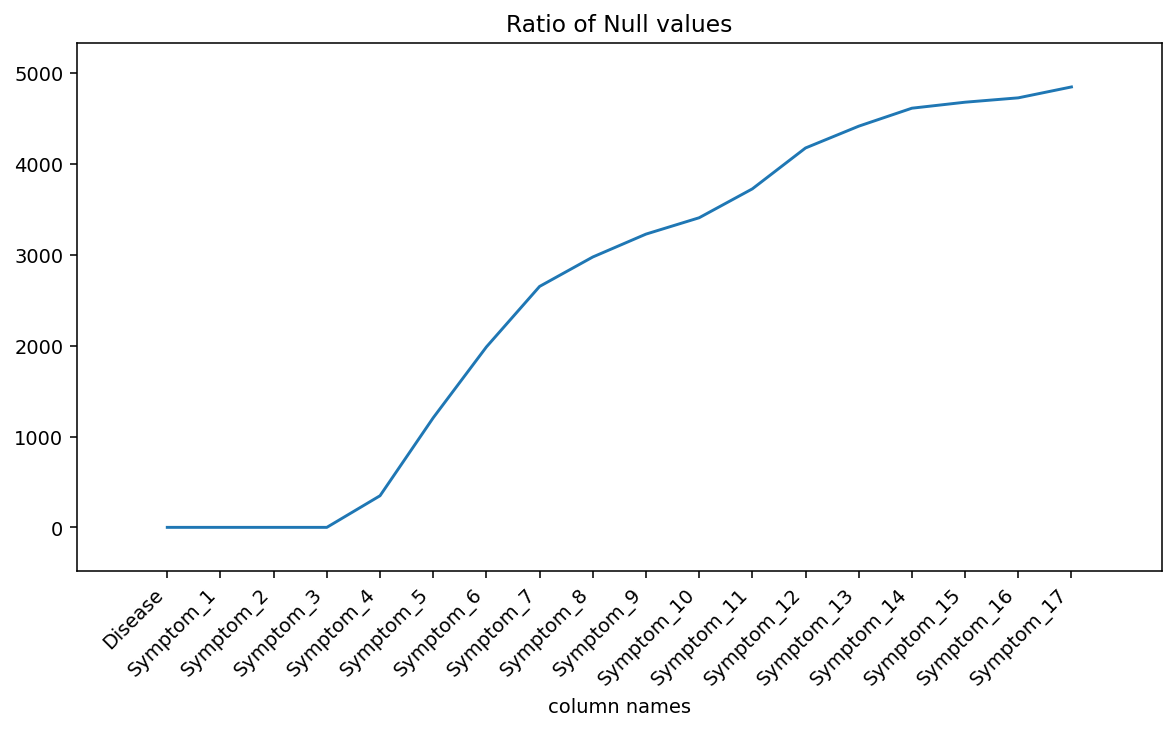

In [13]:
#statistika data null/na
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

# Preprocessing

Pada bagian berikut ini kolom symptom pada dataset akan diubah dengan Label Encoder agar dapat diproses.


In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = [i for i in df.iloc[:,1:].columns]
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [ ]:
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')
diseases.insert(0,'label',df['Disease'])
diseases = diseases.fillna(0)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
diseases.shape

(4920, 132)

In [ ]:
ds_train = diseases.sample(frac = 0.8, random_state = 1)
ds_test = diseases.drop(index = ds_train.index)

x_train, y_train, x_test, y_test =  ds_train.drop('label', axis = 1),\
                                    ds_train['label'],\
                                    ds_test.drop('label', axis = 1),\
                                    ds_test['label']

# Model

Pada bagian ini akan dibuat perbandingan performa dua model klasifikasi, yaitu:
1. Random Forest Classifier dari sklearn dengan Decision Forest dari TensorFlow
2. Neural Network Classifier dari TensorFlow 


##**Model Neural Network**

###Preprocessing (Label Encoding) & Split Dataset

In [ ]:
#Label encoding pada disease
disease_list = list(diseases['label'].unique())
le = LabelEncoder()
encoded_disease = le.fit_transform(disease_list) 

In [ ]:
dictionary={}
for i in range(len(list(le.classes_))):
  dictionary[list(le.classes_)[i]]=i

In [ ]:
dataset2 = diseases.replace(dictionary)
dataset2.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset2.shape

(4920, 132)

In [ ]:
#Split dataset menjadi feature (X) dan label (y)
dataset2.astype(int)
y = dataset2['label']
X = dataset2.drop(columns=['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((3936, 131), (3936,))

In [ ]:
X_train

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
613,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3803,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

index
613     19
4155    28
3803    26
3321    15
3790    37
        ..
4859    20
3264    36
1653     4
2607     3
2732    10
Name: label, Length: 3936, dtype: int64

###Build model architecture & Training data

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(512,input_shape=[131], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(41, activation=tf.nn.softmax)
                                    ])

In [ ]:
adam = Adam(learning_rate=0.001)

In [ ]:
#Callback
callback = EarlyStopping(
    monitor="accuracy",
    patience=10,
    restore_best_weights=True,
    mode='auto'
)

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=adam,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               68096     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 41)                10537     
                                                                 
Total params: 209,961
Trainable params: 209,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=callback)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 2.9753 - accuracy: 0.8440
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 2.8242 - accuracy: 0.9296
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 2.8241 - accuracy: 0.9296
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 2.8241 - accuracy: 0.9296
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 2.8116 - accuracy: 0.9426
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 2.7993 - accuracy: 0.9548
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 2.7993 - accuracy: 0.9548
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 2.7992 - accuracy: 0.9548
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 2.7992 - accuracy: 0.9548
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 2.7992 - accuracy: 0.9548
Epoch 11/50
62/62 [

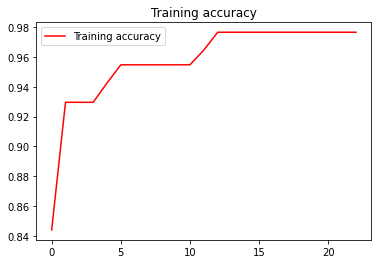

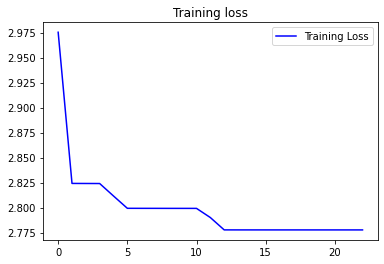

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

###Testing & Evaluate model

In [ ]:
X_test.shape

(984, 131)

In [ ]:
predictions=[]

In [ ]:
for i in range(len(X_test)):
  predictions.append(np.argmax(model.predict(np.array(X_test.iloc[i]).reshape(1,131))))

In [ ]:
testing = pd.DataFrame()
testing['Disease'] = y_test
testing['Pred_Disease'] = predictions

In [ ]:
testing.head()

,Disease,Pred_Disease
index,,
1525,18,18
1013,40,40
1892,36,36
1972,25,25
873,33,33


In [ ]:
print(classification_report(testing['Disease'].values, testing['Pred_Disease'].values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        21
           9       0.95      1.00      0.98        21
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        27
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Model Random Forest**

## Confusion Matrix dan Classification Report

Pada bagian ini akan dibuat modelnya


#Simulation for Expert System

##Fill in symptoms

In [ ]:
#@title **Disease Diagnosis**
#@markdown Pilih gejala yang dialami:
#boolean_checkbox = False #@param {type:"boolean"}
gejala_1 = "itching" #@param ["Other", "itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering", "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue", "muscle_wasting", "vomiting", "burning_micturition", "spotting_urination", "fatigue", "weight_gain", "anxiety", "cold_hands_and_feets", "mood_swings", "weight_loss", "restlessness", "lethargy", "patches_in_throat", "irregular_sugar_level", "cough", "high_fever", "sunken_eyes", "breathlessness", "sweating", "dehydration", "indigestion", "headache", "yellowish_skin", "dark_urine", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "constipation", "abdominal_pain", "diarrhoea", "mild_fever", "yellow_urine", "yellowing_of_eyes", "acute_liver_failure", "fluid_overload", "swelling_of_stomach", "swelled_lymph_nodes", "malaise", "blurred_and_distorted_vision", "phlegm", "throat_irritation", "redness_of_eyes", "sinus_pressure", "runny_nose", "congestion", "chest_pain", "weakness_in_limbs", "fast_heart_rate", "pain_during_bowel_movements", "pain_in_anal_region", "bloody_stool", "irritation_in_anus", "neck_pain", "dizziness", "cramps", "bruising", "obesity", "swollen_legs", "swollen_blood_vessels", "puffy_face_and_eyes", "enlarged_thyroid", "brittle_nails", "swollen_extremeties", "excessive_hunger", "extra_marital_contacts", "drying_and_tingling_lips", "slurred_speech", "knee_pain", "hip_joint_pain", "muscle_weakness", "stiff_neck", "swelling_joints", "movement_stiffness", "spinning_movements", "loss_of_balance", "unsteadiness", "weakness_of_one_body_side", "loss_of_smell", "bladder_discomfort", "foul_smell_ofurine", "continuous_feel_of_urine", "passage_of_gases", "internal_itching", "toxic_look_(typhos)", "depression", "irritability", "muscle_pain", "altered_sensorium", "red_spots_over_body", "belly_pain", "abnormal_menstruation", "dischromic_patches", "watering_from_eyes", "increased_appetite", "polyuria", "family_history", "mucoid_sputum", "rusty_sputum", "lack_of_concentration", "visual_disturbances", "receiving_blood_transfusion", "receiving_unsterile_injections", "coma", "stomach_bleeding", "distention_of_abdomen", "history_of_alcohol_consumption", "blood_in_sputum", "prominent_veins_on_calf", "palpitations", "painful_walking", "pus_filled_pimples", "blackheads", "scurring", "skin_peeling", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails", "blister", "red_sore_around_nose", "yellow_crust_ooze", "prognosis"]
gejala_2 = 'skin_rash' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_3 = 'nodal_skin_eruptions' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_4 = 'continuous_sneezing' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_5 = 'chills' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}

##Predict Disease

In [ ]:
symptoms=[gejala_1,gejala_2,gejala_3,gejala_4,gejala_5]
print(symptoms)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills']


In [ ]:
diseases.columns

Index(['label', ' abdominal_pain', ' abnormal_menstruation', ' acidity',
       ' acute_liver_failure', ' altered_sensorium', ' anxiety', ' back_pain',
       ' belly_pain', ' blackheads',
       ...
       ' watering_from_eyes', ' weakness_in_limbs',
       ' weakness_of_one_body_side', ' weight_gain', ' weight_loss',
       ' yellow_crust_ooze', ' yellow_urine', ' yellowing_of_eyes',
       ' yellowish_skin', 'itching'],
      dtype='object', name='value', length=132)

In [ ]:
symptom_list = X_test.columns.tolist()
result = np.isin(symptom_list, symptoms)
result=list(result)

In [ ]:
for i in range(len(result)):
  if result[i]==True:
    result[i]=1
  else:
    result[i]=0

In [ ]:
diagnosis = np.argmax(model.predict(np.array(result).reshape(1,131)))
diagnosis = list(le.classes_)[diagnosis]

In [ ]:
disease_description = description[description['Disease']==diagnosis]['Description'].values

In [ ]:
disease_description = disease_description[0]

In [ ]:
precautions=[]

In [ ]:
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_1'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_2'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_3'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_4'].values)

In [ ]:
print("Here is your diagnosis result!")
print("Disease name: "+diagnosis)
print("Disease description: "+disease_description)
print("Precautions:")
for i in range(4):
  print(str(i+1)+". "+precautions[i][0])

Here is your diagnosis result!
Disease name: Fungal infection
Disease description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
Precautions:
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths


## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.